# ML T-Generation Занятие 3: Линейная регрессия.
# Проблема переобучения. Кросс-валидация и регуляризация.

Авторы: Гаркавый Андрей (andrewgarkavyy@gmail.com), Кирилл Васильев (kirivasile@yandex.ru)

Переработал: Чайников Константин (chainikov.k.m@gmail.com)

## 0. План

1. Линейная регрессия

2. Приближение многочленом

3. Переобучение

4. Выводы

5. Разделение на тренировочную и тестовую части

6. Кросс-валидация

7. Как подбираются коэффициенты

8. Регуляризация



## 1. Линейная регрессия
**Регрессией** называется задача машинного обучения с учителем, в которой у нас есть много объектов с признаками, у которых надо научиться приближенно предсказывать значение целевой функции, которая равна какому-то **действительному числу**. 

В этом будет отличие задачи регрессии от задачи классификации - регрессия предсказывает число, а классификация - один из нескольких классов.**Текст, выделенный полужирным шрифтом**

In [55]:
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import pandas as pd
%matplotlib inline

from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [6]:
model = LinearRegression(fit_intercept=True  )

Давайте положим в X какие-то трехмерные векторы.

In [7]:
X = np.ones((200,3))

X[:,1]*=np.random.normal(0,1,(200,))
X[:,2]*=np.random.normal(0,1,(200,))
X

array([[ 1.00000000e+00,  9.55808014e-01, -4.39521898e-01],
       [ 1.00000000e+00,  1.32206947e+00, -6.25930332e-01],
       [ 1.00000000e+00,  1.61069783e+00,  6.06750479e-01],
       [ 1.00000000e+00,  1.89151216e-01,  1.08894949e+00],
       [ 1.00000000e+00, -2.56232924e+00,  5.91704410e-01],
       [ 1.00000000e+00, -9.60553195e-01, -1.46435973e+00],
       [ 1.00000000e+00, -1.38194079e-01,  1.41800683e+00],
       [ 1.00000000e+00,  1.39135625e+00,  8.07983296e-01],
       [ 1.00000000e+00, -1.97837846e-01, -5.93260034e-02],
       [ 1.00000000e+00,  1.89441623e+00,  5.25736402e-01],
       [ 1.00000000e+00,  7.27098759e-01,  2.86762844e-01],
       [ 1.00000000e+00, -1.10625084e+00,  1.79005939e+00],
       [ 1.00000000e+00, -8.22028240e-01, -2.60947876e-01],
       [ 1.00000000e+00, -7.59571647e-01,  1.08408162e+00],
       [ 1.00000000e+00, -1.76722381e+00, -1.28922072e+00],
       [ 1.00000000e+00,  3.38001504e-01, -1.21693640e+00],
       [ 1.00000000e+00,  1.32606045e+00

Построим $y$ по такой формуле:

$$y = 50 + 14x_1 - 7x_2  + \varepsilon$$

Где $\varepsilon$ - это какой-то шум с нормальным распределением с дисперсией 5, чтобы линейная формула не была уж совсем точной.

In [8]:
y = X @ np.array([50,14,-7]) + np.random.normal(0,5,(200,))
y

array([66.86715234, 75.93988433, 61.74792213, 48.80139368,  9.62646817,
       50.3594907 , 38.94288079, 64.22659911, 52.69124693, 73.18732635,
       54.5567573 , 19.13344415, 43.20908156, 38.05364638, 30.516579  ,
       78.51048404, 77.31038376, 58.00133945, 48.46029052, 50.82791881,
       53.92075921, 57.67361862, 66.90591161, 24.29238827, 49.88632469,
       51.07360098, 45.3518066 , 67.46539689, 48.14906299, 42.52409052,
       36.44128815, 94.69338261, 80.82842897, 91.14973142, 45.17907103,
       31.45650595, 72.33468951, 39.47355197, 90.68064532, 48.22244041,
       33.05734636, 39.39916942, 43.02354821, 44.32664414, 72.02881594,
       61.41027021, 50.03667254, 53.28268607, 47.86781218, 42.75430419,
       59.97149197, 39.77969521, 50.85962142, 44.8025597 , 74.72038425,
       44.25910509, 59.01519659, 52.32096639, 34.11887971, 52.18499871,
       53.55895257, 49.21617625, 64.90899385, 38.80494701, 37.69703304,
       31.90543278, 48.90163867, 13.45841057, 64.09358292, 46.53

Теперь обучим на этих данных линейную регрессию и посмотрим, сможет ли она восстановить параметры модели $50, 14, -7$.

In [9]:
model.fit(X[:,[1,2]], y)

LinearRegression()

In [10]:
coefs = model.coef_
coefs

array([13.79081881, -7.2874931 ])

In [11]:
const = model.intercept_
const

50.26187999697356

In [12]:
np.linalg.inv(X.T @ X) @ X.T @ y 

array([50.26188   , 13.79081881, -7.2874931 ])

In [13]:
# X = np.ones((200,3))
# X[:,1]*=np.random.normal(0,1,(200,))
# X[:,2]*=np.random.normal(0,1,(200,))

# y = X @ np.array([50,14,-7]) + np.random.normal(0,5,(200,))

In [14]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.scatter_3d(np.concatenate((X,y.reshape(-1,1)), axis=1),  x=1, y=2, z=3,
                    size_max=5, opacity=0.5, color_discrete_sequence=['red'])

# tight layout
fig.update_layout(margin=dict(l=10, r=100, b=100, t=10))

x1 = np.linspace(-3, 3, 30)
y1 = np.linspace(-3, 3, 30)
xx, yy = np.meshgrid(x1, y1)
z = np.c_[xx.ravel(), yy.ravel()] @ np.array(coefs[0:2]) + const 

# transpose
z = z.reshape(xx.shape)
fig.add_traces(go.Surface(x=x1, y=y1, z=z, showscale=False,
                          opacity=0.3, colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]))
fig.show()

И внезапно линейная регрессия как-то примерно угадала наши коэффициенты! Примерно, потому что мы добавили шум.

Как она это делает? Сейчас узнаем.

### КАК работает линейная регрессия

По сути мы хотим подобрать числа $a_0, a_1, a_2, a_3$ для вот такой модели:

$$f(x_1, x_2, x_3) = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$$

Мы хотим подобрать их так, чтобы функция потерь на наших данных была минимальна. В LinearRegression используют функцию потерь MSE - сумму квадратов отклонений от настоящего значения.

То есть задача такая:

$$\sum\limits_{i=1}^{n}(f(x_{i1}, x_{i2}, x_{i3}) - y_i)^2 \rightarrow \min$$


$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)^2 \rightarrow \min$$

Где n - это количество входных данных. Давайте рассмотрим эту сумму как функцию от 4 переменных $a_0, a_1, a_2, a_3$, которую нам нужно минимизировать. А числа $x_{ij}$ и $y_i$, получается, будут обычными константами.

$$MSE(a_0, a_1, a_2, a_3) \rightarrow \min$$

Давайте посчитаем частную производную по каждой координате.

Начнем с координаты $a_1$.

$$MSE'_{a_1}(a_0, a_1, a_2, a_3) = \sum\limits_{i=1}^{n}((a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)^2)'_{a_1}=$$

Раскрываем квадрат, вынося отдельно члены, которые делятся на $a_1^2$, $a_1$ и $1$.

$$= \sum\limits_{i=1}^{n}(x_{i1}^2a_1^2 + 2x_{i1}(a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)a_1 + (a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)^2)'_{a_1}=$$

Считаем производную, одна из скобок при этом обнуляется:

$$= \sum\limits_{i=1}^{n}(2x_{i1}^2a_1 + 2x_{i1}(a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i))=$$

Теперь вынесем $2$ и $x_{i1}$

$$= 2\sum\limits_{i=1}^{n}(x_{i1}a_1 + a_0 + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i1}=$$

Заметим, что в скобках получилось очень простое выражение!

$$= 2\sum\limits_{i=1}^{n}(f(x_{i1}, x_{i2}, x_{i3}) - y_i)x_{i1}$$

Давайте приравняем все 4 производные (по $a_0, a_1, a_2, a_3$) нулю, тогда:

$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i) = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i1} = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i2} = 0$$
$$\sum\limits_{i=1}^{n}(a_0 + a_1 x_{i1} + a_2 x_{i2} + a_3 x_{i3} - y_i)x_{i3} = 0$$

Давайте сгруппируем все выражения по $a_0, a_1, a_2, a_3$:

$$na_0 + (\sum\limits_{i=1}^{n}x_{i1})a_1 + (\sum\limits_{i=1}^{n}x_{i2})a_2 + (\sum\limits_{i=1}^{n}x_{i3})a_3= \sum\limits_{i=1}^{n}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i1})a_0 + (\sum\limits_{i=1}^{n}x_{i1}^2)a_1 + (\sum\limits_{i=1}^{n}x_{i1}x_{i2})a_2 + (\sum\limits_{i=1}^{n}x_{i1}x_{i3})a_3= \sum\limits_{i=1}^{n}x_{i1}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i2})a_0 + (\sum\limits_{i=1}^{n}x_{i1}x_{i2})a_1 + (\sum\limits_{i=1}^{n}x_{i2}^2)a_2 + (\sum\limits_{i=1}^{n}x_{i2}x_{i3})a_3= \sum\limits_{i=1}^{n}x_{i2}y_i$$

$$(\sum\limits_{i=1}^{n}x_{i3})a_0 + (\sum\limits_{i=1}^{n}x_{i1}x_{i3})a_1 + (\sum\limits_{i=1}^{n}x_{i2}x_{i3})a_2 + (\sum\limits_{i=1}^{n}x_{i3}^2)a_3= \sum\limits_{i=1}^{n}x_{i3}y_i$$

Ура, мы получили красивую симметричную систему уравнения, 4 уравнения, 4 неизвестных. Если определитель матрицы коэффициентов не равен нулю, то у него есть ровно одно решение, и его мы умеем находить (методом Гаусса, например). Если определитель вдруг стал равен нулю, то решений либо 0, либо бесконечно.

У непрерывно-дифференцируемой функции, которая при стремлении по каждой координате к плюс или минус бесконечности сама стремится к плюс бесконечности, всегда существует глобальный минимум. В точке глобального минимума все производные как раз равны нулю. Следовательно, существует всегда хотя бы одно решение, и мы его найдем.

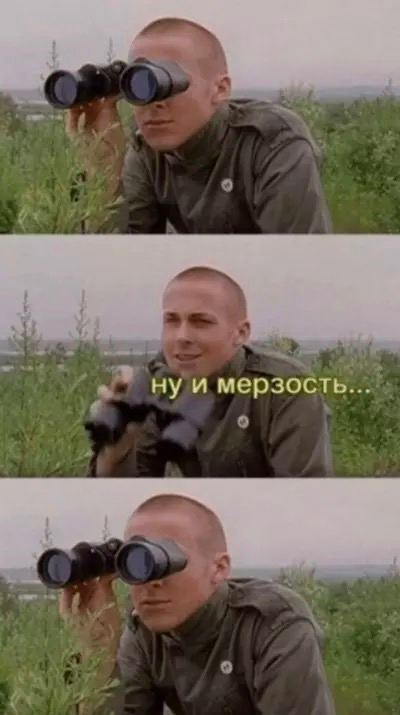

## 2. Приближение одномерной функции многочленом

Начнем с простой задачи.


1) Есть функция $f(x)$, но мы ее не знаем.

2) Зато мы знаем ее значения в $m$ точках (они называются тренировочным множеством):
$$f(x_1) = y_1$$
$$\cdots$$
$$f(x_m) = y_m$$
3) Нужно научиться приблизительно восстанавливать эту функцию.

Самый простой способ - научиться приближать её многочленом, а именно давайте подберем такие коэффициенты $a_0, a_1, \ldots, a_n$, чтобы многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$ был как можно ближе к $f(x)$.

Но что такое "приблизить"? Мы знаем лишь значения в $m$ точках, так что в лучшем случае она должна проходить через все эти точки (хотя скоро мы увидим, что это не так).

В этом случае обычно пытаются минимизировать сумму квадратов ошибок во всех точках, то есть **функцию потерь** $$Q(P) = \sum_i (P(x_i) - f(x_i))^2 $$

Эту величину называют **MSE** - Mean Squared Error (средняя квадратичная ошибка).

Тут может возникнуть вопрос, почему мы берем именно сумму квадратов, а не, например, сумму модулей. Однозначного ответа на этот вопрос нет, наиболее удачный ответ, пожалуй такой: у суммы квадратов есть много удобных свойств, например это выпуклая, дифференцируемая функция. Тем не менее иногда другой выбор может быть оправданным. Если вам интересно чуть больше понять про смысл этих условий, можете решить такие задачи:

**(0.5 балла) Доп. Задача 1.** Найдите число m такое, что для заданных $x_i$ сумма $\sum|m - x_i|$ минимальна

Сделаем следующие преобразования: $$\sum|m - x_i| = \sum|x_i - m|$$
По оптимальному свойству медианы: $$\sum|x_i - m| \rightarrow min \Rightarrow m - медиана$$

Сумма абсолютных отклонений значений признака от медианы меньше, чем от любой другой величины.



**(0.5 балла) Доп. Задача 2.** Найдите число m такое, что для заданных $x_i$ сумма $\sum(m - x_i)^2$ минимальна


Сделаем следующие преобразования: $$\sum(m - x_i)^2 = (m-x_1)^2 + (m - x_2)^2 + ... + (m - x_n)^2 = 
n*m^2 - 2m*(x_1 + x_2 + ... + x_n) + (x_1^2 + x_2^2+...+x_3^2) = n*m^2 - 2*m*n*\bar{x} + (x_1^2 + x_2^2+...+x_3^2)$$ 
Найдем производную этой функции по параметру $m$: $$2*n*m - 2*n*\bar{x} = 0 \Rightarrow m = \bar{x}$$
Значит $m$ $-$ среднее арифметическое


Сейчас можно их и пропустить.


Сначала просто нарисуем какой-нибудь многочлен, например $f(x) = 3x^3 - 2x^2 + x$ на отрезке $[-1, 1]$:

In [15]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

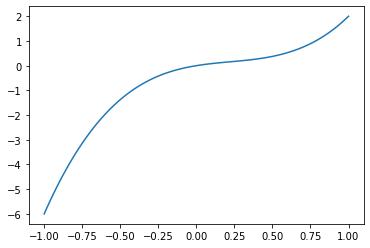

In [16]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))
plt.show()

Теперь зададим набор точек (10 штук) и посмотрим что будет, если подобрать по ним коэффициенты нашего многочлена:

In [17]:
x = np.linspace(-1, 1, 10)  # 10 точек на отрезке [-1, 1]
y = f(x)
coefs = np.polyfit(x, y, deg = 2)
coefs

array([-2.00000000e+00,  3.17037037e+00, -3.93270787e-16])

(это означает многочлен $-2x^2 + 3.17037 x$)

numpy позволяет легко работать с многочленами, заданными их коэффициентами. Мы можем создать из них объект poly1d, который можно будет просто вызывать для получения нужных значений:

In [18]:
poly = np.poly1d(coefs)
poly(0), poly(1), poly(2)

(-3.93270786911128e-16, 1.1703703703703716, -1.659259259259255)

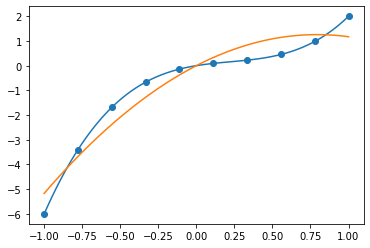

In [19]:
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

Довольно ожидаемо, наша функция (оранжевая) не очень похожа на то, что мы искали (синяя). Наверное зря мы пытаемся приблизить кубическую функцию многочленом второй степени. Давайте попробуем 3-ю степень.

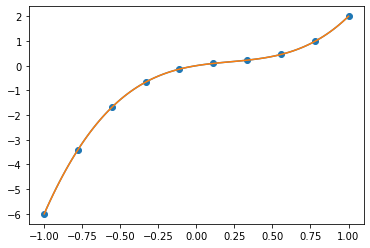

In [20]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

На этот раз мы в точности угадали функцию. Можете проверить, что если увеличивать степень многочлена, результат не меняется: более высокие степени тут просто не нужны.

Но мы сейчас жили в идеальном мире. На практике чаще всего известные нам значения не совсем точны. Давайте добавим к значениям нашей функции немного шума:

In [67]:
def f_real(x):
    return 3 * x ** 3 - 2 * x**2 + x + np.random.normal(0, 1, x.shape)

In [68]:
x.shape

(10,)

In [153]:
x = np.linspace(-1, 1, 10)
y = f_real(x) + np.random.normal(0, 0.5, 10)  # случайный шум

In [154]:
x100 = np.linspace(-1, 1, 100)
x200 = np.linspace(-2, 2, 100)
x150 = np.linspace(-1.1, 1.1, 100)

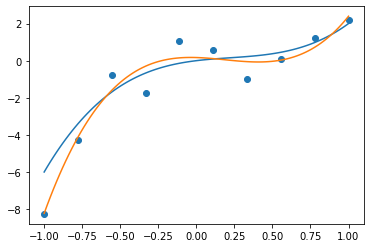

In [155]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

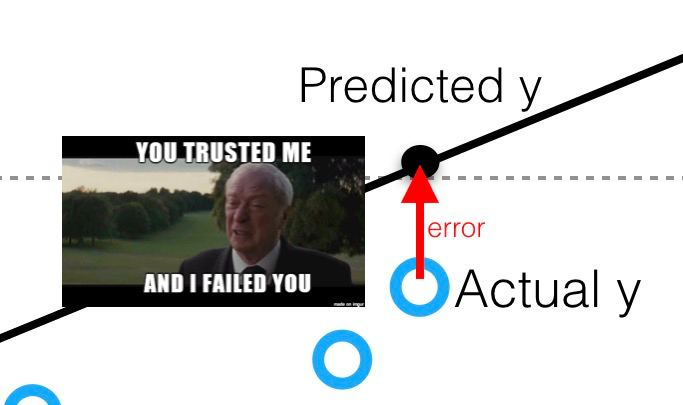

Теперь мы почти попали. Перед тем как читать дальше, подумайте над заданием.

**(1 балл) Обязательное задание 1:** попробуйте увеличить степень полинома. Что произойдет с графиком нашего приближения? Посмотрите  как обе функции себя ведут вне интервала x. Попробуйте сформулировать проблему, с которой мы столкнулись.

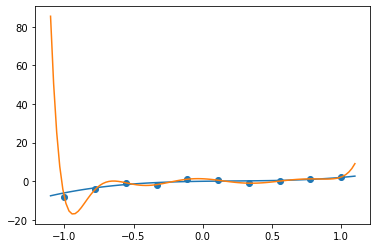

In [156]:
coefs = np.polyfit(x, y, deg = 10)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x150, f(x150))
plt.plot(x150, poly(x150))
plt.show()

Как мы видим наша функция высокого порядка идеально подогналась под наши точки, однако мы видим как сильно она отличается от нашей настоящей функции. Это говорит о том что если мы рассморим еще точки нашей функции и сравним их отклонение со значениями на функции высокого порядка, то получим очень большое отклонение. (Проблема переобучения)

## 3. Переобучение

То, что вы увидели при решении этого задания называется в машинном обучении **переобучением** (overfittig).

Если мы используем достаточно сложную модель (то есть модель, у которой много параметров, в нашем случае -- многочлен достаточно высокой степени), то у модели появляется возможность "выучить" все точки, которые она видела. Например, если задано $m$ точек, всегда можно подобрать многочлен степени $m-1$, который через них проходит (если вы не знакомы с этим фактом, можете подумать, как его доказать).


"Честный" способ проверять качество нашей апроксимации -- **смотреть точность в точках, которые мы не использовали при подборе многочлена**. Это множество часто называют тестовым множеством. Давайте зададим его так:

In [76]:
# возьмем 10 случайных точек от 0 до 1
x_test = np.random.random(30) 

# превратим их в 10 случайных точек от -1 до 1
x_test = 2 * x_test - 1
x_test

array([-0.04631549, -0.67833855,  0.52026061, -0.15755316, -0.67246846,
       -0.7211904 , -0.17682867, -0.53607148,  0.88096543, -0.62949749])

**(1 балл)  Обязательное задание 2:** напишите функцию, которая для данного многочлена считает его качество на тестовом множестве (то есть среднеквадратичное отклонение между значениями функции $f$ и многочлена $P$ на тестовой выборке).

Вы все прошлое занятие изучали разные функции, попробуйте сделать MSE как можно более компактной функцией (желательно в одну строчку).

In [319]:
#y_test = f_real(x_test[:20])
#y_real = f_real(x_test[20:])
#
#coefs = np.polyfit(x_test[:20], y_test, deg = 3)
#poly = np.poly1d(coefs)
#y_pred = poly(x_test[20:])
#
# они одной длины
def MSE(y_real, y_pred):
    return np.square(y_real-y_pred).mean()

Проверим, сравнив со встроенным MSE

In [330]:
from sklearn.metrics import mean_squared_error

y_real = np.arange(5)
y_pred = y_real + np.random.normal(0, 0.5, 5)

print(MSE(y_real, y_pred), mean_squared_error(y_real, y_pred))


0.33231597108827626 0.33231597108827626


**(1 балл) Обязательное задание 3:** нарисуйте график зависимости ошибки на тестовом множестве от степени многочлена. При какой степени ошибка минимальна?


In [332]:
def f_real(x):
    return 3 * x ** 3 - 2 * x**2 + x +  np.random.normal(0, 0.5, 40)

Text(0.5, 0, 'степень полинома')

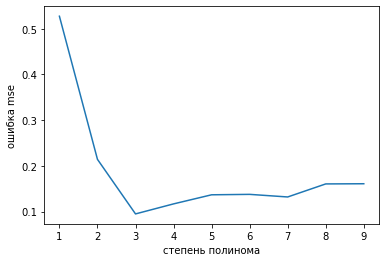

In [334]:
X = np.linspace(-1, 1, 40)
y = f_real(X)   
tmp=9

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mse = np.empty(())
DEG = np.arange(1, tmp+1)
for i in range(1, tmp+1):
        coefs = np.polyfit(X_train, y_train, deg = i)
        poly = np.poly1d(coefs)
        y_pred = poly(X_test)
        mse = np.append(mse, np.square(y_test-y_pred).mean())
        #print(i, np.square(y_test-y_pred).mean())

#print(mse)
plt.plot(DEG, mse[1:])
plt.ylabel("ошибка mse")
plt.xlabel("степень полинома")

Как и ожидалось при степени полинома 3 mse минимально


Как мы видим ошибка на многочелене 3 степени минимальна, как мы и ожидали, ведь многочлен 3 степени будет лучше всего приближать нашу функцию f_real

**(1 балл) Доп. задача 5:** как меняется график, если увеличивать количество точек в множестве, на котором мы подбираем многочлен?

In [338]:
def f_real(x, quan):
    return 3 * x ** 3 - 2 * x**2 + x +  np.random.normal(0, 0.5, quan)

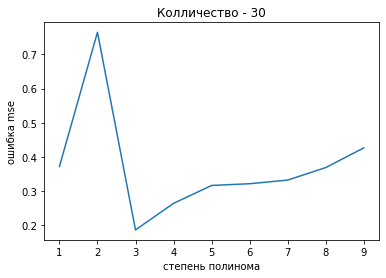

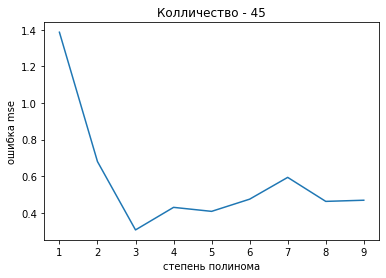

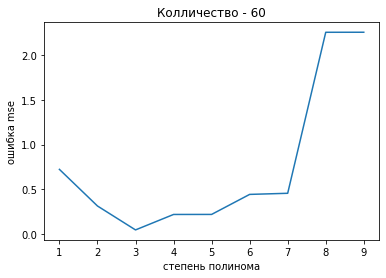

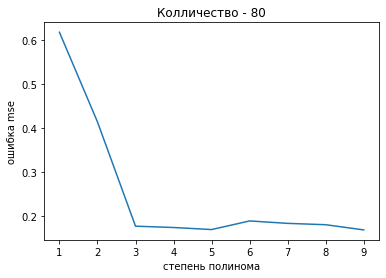

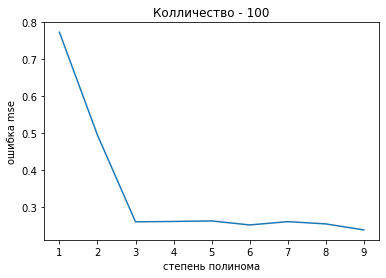

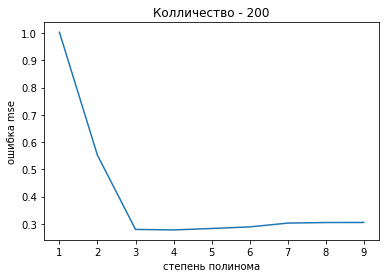

In [348]:
arr = np.array([30, 45, 60, 80, 100, 200])

for i in arr:
        quan = i

        X = np.linspace(-1, 1, quan)
        y = f_real(X, quan)   
        tmp=9

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        mse = np.empty(())
        DEG = np.arange(1, tmp+1)
        for i in range(1, tmp+1):
                coefs = np.polyfit(X_train, y_train, deg = i)
                poly = np.poly1d(coefs)
                y_pred = poly(X_test)
                mse = np.append(mse, np.square(y_test-y_pred).mean())
                #print(i, np.square(y_test-y_pred).mean())

        #print(mse)
        plt.plot(DEG, mse[1:])
        plt.title("Колличество - " + str(quan))
        plt.ylabel("ошибка mse")
        plt.xlabel("степень полинома")
        plt.show()

Мы наблюдаем, что степень 3 так или иначе подходит под наилучшую (одну из) степеней для аппроксимации настоящей функции. На большом колличестве точек у более высоких степеней многочлена ошибка также уменьшается, так как они лучше подгоняются под настоящую функцию на отрезке от -10 до 10. Конечно если мы начнем смотеть вне этого отрезка то увидим что ошибка будет много больше.

## 4. Выводы

1. Цель машинного обучения с учителем - приблизить **целевую функцию** (target) по её значениям (возможно приблзительным) в некоторых точках.

В нашем случае - это $f(x) = 3x^3 - 2x^2 + x$. Обычно она, конечно, никому неизвестна.

2. Множество точек с известным значением функции называется **тренировочным множеством** (train).

В нашем случае - это 10 точек, выбранных равномерно на отрезке $[-1, 1]$.

3. Чтобы приблизить функцию, нужно использовать какую-то **модель** (model), приближающую функцию.

В данном случае - это многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$.

4. Мы выбираем **функцию потерь** (loss function) для сравнения результатов модели и реальных значения на тренировочном множестве. Чем она меньше, тем лучше наша модель.

В данном случае - это $MSE = \sum_i (P(x_i) - f(x_i))^2$.

5. У модели есть **параметры**, которые мы выбираем так, чтобы функция потерь на тренировочном множестве была минимальна.

В данном случае - это коэффициенты многочлена ($a_0, a_1, \ldots, a_n$). Выбираются они с помощью пока магической для нас функции polyfit.

6. У модели есть **гиперпараметры**, которые мы выбираем сами.

В данном случае - это степень многочлена (число $n$).

7. Однако такой подход с минимизацией функции потерь может привести к тому, что мы идеально приблизим функцию на тренировочном множестве, но она будет абсолютно отличаться во всех остальных точках. Это явление называется **переобучением**.

В данном случае - мы видели, что если степень многочлена большая (больше трех), то мы попадаем во все точки, но при этом сам многочлен сильно отличается от $f(x)$.

8. Чтобы бороться с переобучением, полезно выделить **тестовое множество** точек, в которых мы тоже знаем результаты функции. Оно никак не используется при обучении модели, и нужно только для валидации результата.

В данном случае - мы взяли рандомные 10 точек на отрезке $[-1, 1]$.

9. В идеальном случае функция потерь на тренировочном и тестовом множестве не отличается. А вот если на тренировочном функция потерь получается гораздо меньше, чем на тестовом, то это говорит о том, что происходит переобучение.

Действительно, при большой степени MSE близка к или равна нулю на тренировочном множестве, а на тестовом множестве нет.

10. Единственный пока способ, который мы знаем, чтобы влиять на переобучение - это перебирать **гиперпараметры** модели так, чтобы **минимизировать функцию потерь на тестовом множестве**.

Действительно, если выбрать степень 3, то функция потерь окажется минимальной на тестовом множестве, как мы видели в задании 3.

## 5. Разделение на тренировочную и тестовую части

Если вы решите поучаствовать в каком-нибудь соревновании по машинному обучению, вы увидите, что тестовое множество вам недоступно (иначе было бы неинтересно: очень легко обучиться предсказывать то, что ты уже видел).

В реальной жизни обычно тоже считают, что на тестовом множестве можно провериться один раз -- в самом конце. Иначе вы начнете подкручивать гиперпараметры глядя на результат на тестовой выборке и, сами того не замечая, переобучитесь.

Как поступать в такой ситуации? Придется пожертвовать частью точек, которые даны нам для обучения и использовать их для подбора гиперпараметров в нашем алгоритме (в нашем случае это степень многочлена).

То есть придется из точек, у которых мы знаем результаты, убрать, например, 10% в тестовое множество.

Функция для этого есть, например, в пакете sklearn

In [ ]:
X = np.linspace(-1, 1, 50)
y = f_real(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train, y_train

(array([ 0.42857143, -0.51020408,  0.71428571,  0.3877551 , -0.83673469,
        -0.59183673,  0.26530612, -0.46938776, -1.        ,  0.06122449,
        -0.10204082, -0.3877551 , -0.26530612,  0.02040816,  0.87755102,
        -0.87755102,  0.83673469,  0.91836735, -0.2244898 , -0.75510204,
        -0.18367347,  0.63265306, -0.95918367,  0.2244898 , -0.79591837,
        -0.06122449,  0.14285714, -0.42857143,  0.10204082,  0.75510204,
        -0.30612245,  0.95918367, -0.55102041, -0.67346939,  0.18367347,
         0.67346939,  0.46938776, -0.91836735,  0.34693878,  0.79591837,
        -0.63265306, -0.34693878,  0.51020408,  0.30612245,  1.        ]),
 array([ 0.5637808 , -0.77881776,  1.37089808, -0.59038316, -3.99732397,
        -3.69716031,  1.684358  , -1.80912352, -5.55858972,  1.45762264,
        -1.00912939,  0.19120595,  0.60594073,  1.04835454,  2.52841182,
        -4.19765684,  2.01947067,  0.74853727, -1.02214724, -4.21264519,
        -1.0325151 , -0.5505917 , -5.21925849, -0

In [ ]:
X_test, y_test

(array([ 0.59183673, -0.02040816, -0.14285714,  0.55102041, -0.71428571]),
 array([ 0.29078084,  1.40787861, -1.11334417,  0.13239808, -2.7552937 ]))

## 6. Кросс-валидация

Также есть более точный способ проводить валидацию результата. Если разделить множество один раз на тестовое и тренировочное, то это может значительно влиять на результат. Вдруг в тестовое множество случайно попали такие точки, в которых предсказать значение тяжелее или легче, чем обычно?

Тогда можно применить **кросс-валидацию** - давайте разделим множество на 10 примерно равных частей, тогда у нас есть 10 разделений на тренировочное и тестовое множество - как тестовое множество выберем по очереди каждую из этих частей, а как тренировочное выберем все остальные части. В итоге, все элементы множества побывают и в тренировочной, и в тестовой чати.

Можно посчитать результат на каждом из 10 разбиений и просто усреднить результат.


In [ ]:
# Есть вот такая удобная штука
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print(test_index, train_index)

[0 1 2 3 4] [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[5 6 7 8 9] [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[10 11 12 13 14] [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[20 21 22 23 24] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[25 26 27 28 29] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[30 31 32 33 34] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

**(1 балл) Доп. задача 6:** проделайте все вышеописанное с функцией $f(x) = \frac{1}{1 + e^{-x}}$ на отрезке $[-3, 3]$. Как оптимальная степень зависит от количества точек, по которым вы подбираете многочлен?

1. Построить заданную функцию

2. Взять 10 точек от -3 до 3 и приближать её полиномом разной степени, построить график ошибки

3. Взять 10 случайных точек от -3 до 3 и посмотреть ошибку на этих точках полиномиальных функций обученных по пункту 2 (т.е. взять тренировочные точки для обучения из пункта 2, а тестировать случайными точками) построить график.

4. Добавить в функцию случайный шум и проделать пункты 2 и 3 для неё.

5. Увеличить количество тренировочных(только тренировочных) точек с 10 например до 20 40 60. И проделать пункты 2 и 3, для этих сэмплов

6. Сделать выводы.

Постороим нашу функцию:

In [190]:
def sig(x):
    return 1/(1+np.exp(-x))

Text(0, 0.5, 'Sigmoid(x)')

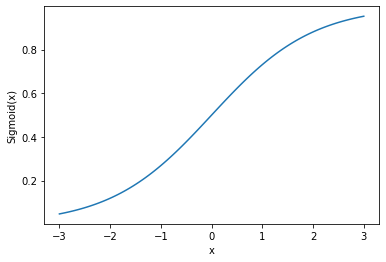

In [196]:
x = np.linspace(-3, 3, 100)
y = sig(x)
plt.plot(x, y) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)") 

Посмотрим на графики полиномов различных степеней, которые приближают эту функцию:

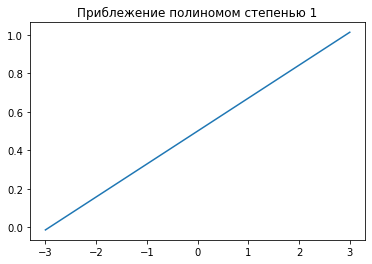

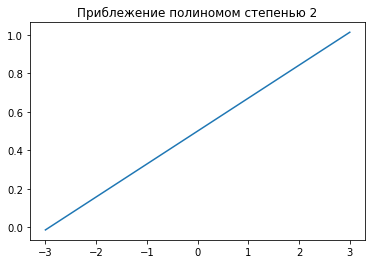

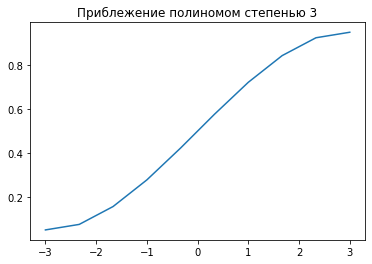

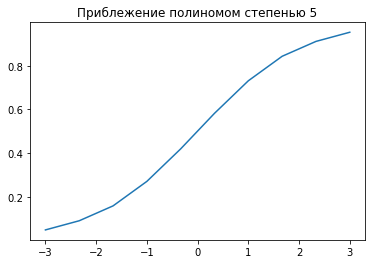

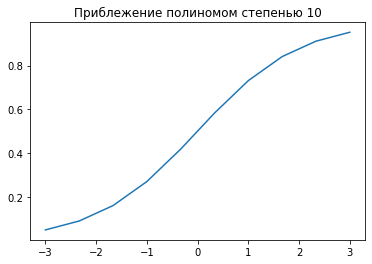

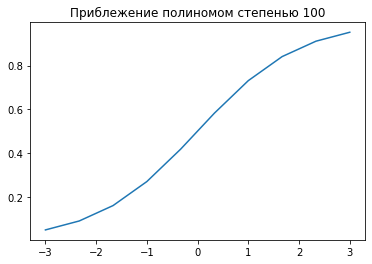

In [356]:
import plotly.graph_objects as go

x = np.linspace(-3, 3, 10)
y = sig(x)

arr =np.array([1, 2, 3, 5, 10, 100])

for i in arr:
    coefs = np.polyfit(x, y, deg = i)
    poly = np.poly1d(coefs)
    plt.plot(x, poly(x))
    plt.title("Приблежение полиномом степенью " + str(i))
    plt.show()


Построим зависимость ошибки от степени полинома

0.002243172384993187
0.0022431723849931848
5.7219940680833564e-05
5.721994068083331e-05
9.544133163698467e-07
9.54413316369818e-07
4.663608316731932e-09
4.663608316732943e-09
3.284855039049689e-29
3.341536601760464e-31
3.110720157197973e-29
[2.24317238e-03 2.24317238e-03 5.72199407e-05 5.72199407e-05
 9.54413316e-07 9.54413316e-07 4.66360832e-09 4.66360832e-09
 3.28485504e-29 3.34153660e-31 3.11072016e-29]


Text(0.5, 0, 'степень полинома')

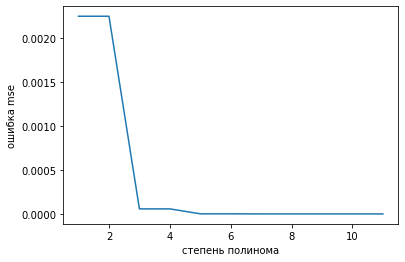

In [365]:
X = np.linspace(-3, 3, 10)
y = sig(X)   
tmp=11


mse = np.empty(())
DEG = np.arange(1, tmp+1)
for i in range(1, tmp+1):
        coefs = np.polyfit(X, y, deg = i)
        poly = np.poly1d(coefs)
        mse = np.append(mse, np.square(sig(X)-poly(x)).mean())
plt.plot(DEG, mse[1:])
plt.ylabel("ошибка mse")
plt.xlabel("степень полинома")

Теперь добавим шум


In [375]:
def sig(x):
    return 1/(1+np.exp(-x)) + np.random.normal(0, 0.05, x.shape)

Text(0.5, 1.0, 'Сигмойда с шумом')

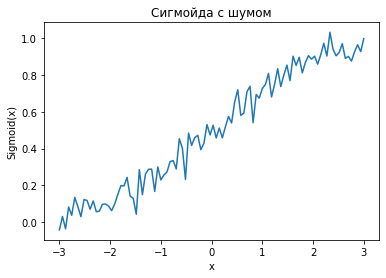

In [377]:
x = np.linspace(-3, 3, 100)
y = sig(x)
plt.plot(x, y) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)") 
plt.title("Сигмойда с шумом")

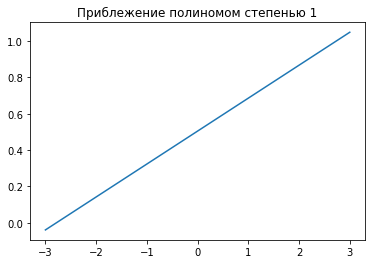

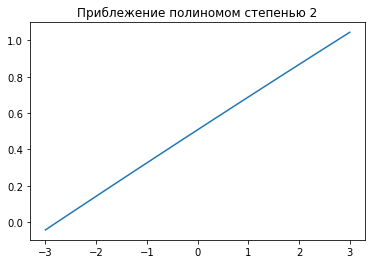

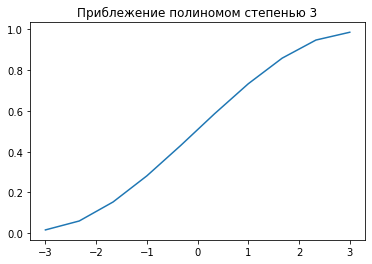

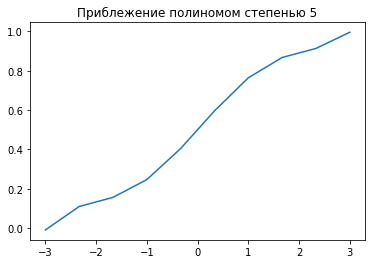

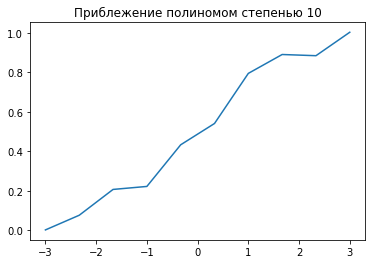

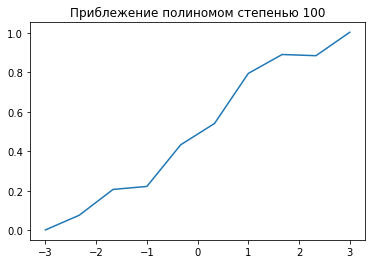

In [378]:
import plotly.graph_objects as go

x = np.linspace(-3, 3, 10)
y = sig(x)

arr =np.array([1, 2, 3, 5, 10, 100])

for i in arr:
    coefs = np.polyfit(x, y, deg = i)
    poly = np.poly1d(coefs)
    plt.plot(x, poly(x))
    plt.title("Приблежение полиномом степенью " + str(i))
    plt.show()


Text(0.5, 0, 'степень полинома')

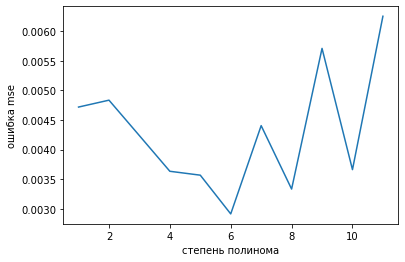

In [380]:
X = np.linspace(-3, 3, 10)
y = sig(X)   
tmp=11


mse = np.empty(())
DEG = np.arange(1, tmp+1)
for i in range(1, tmp+1):
        coefs = np.polyfit(X, y, deg = i)
        poly = np.poly1d(coefs)
        mse = np.append(mse, np.square(sig(X)-poly(x)).mean())
plt.plot(DEG, mse[1:])
plt.ylabel("ошибка mse")
plt.xlabel("степень полинома")

Теперь увеличим количество тренирововочных семплов до 20

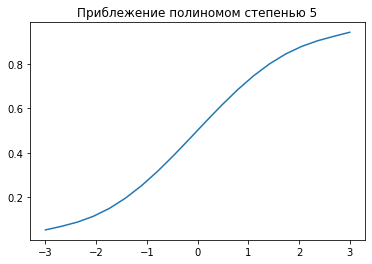

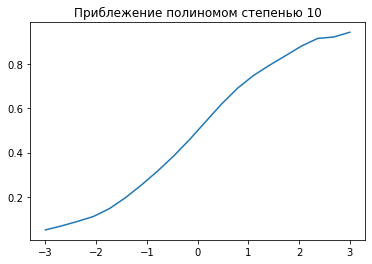

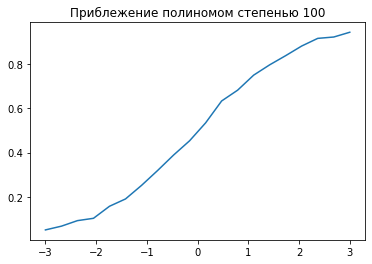

Text(0.5, 0, 'степень полинома')

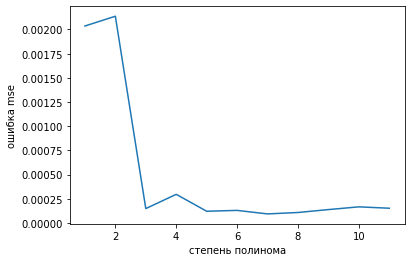

In [382]:
def sig(x):
    return 1/(1+np.exp(-x)) + np.random.normal(0, 0.01, x.shape)

import plotly.graph_objects as go

x = np.linspace(-3, 3, 20)
y = sig(x)

arr =np.array([5, 10, 100])

for i in arr:
    coefs = np.polyfit(x, y, deg = i)
    poly = np.poly1d(coefs)
    plt.plot(x, poly(x))
    plt.title("Приблежение полиномом степенью " + str(i))
    plt.show()


X = np.linspace(-3, 3, 20)
y = sig(X)   
tmp=11


mse = np.empty(())
DEG = np.arange(1, tmp+1)
for i in range(1, tmp+1):
        coefs = np.polyfit(X, y, deg = i)
        poly = np.poly1d(coefs)
        mse = np.append(mse, np.square(sig(X)-poly(x)).mean())
plt.plot(DEG, mse[1:])
plt.ylabel("ошибка mse")
plt.xlabel("степень полинома")

Теперь до 40

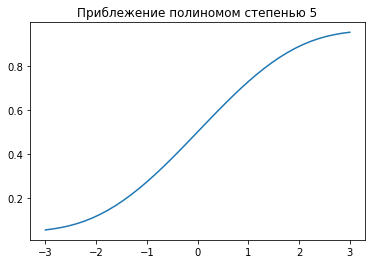

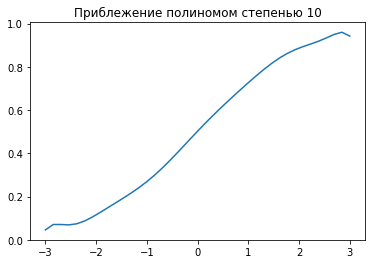

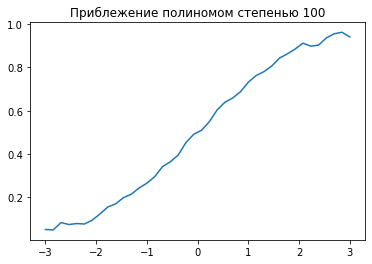

Text(0.5, 0, 'степень полинома')

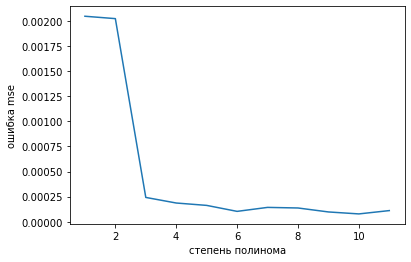

In [383]:
def sig(x):
    return 1/(1+np.exp(-x)) + np.random.normal(0, 0.01, x.shape)

import plotly.graph_objects as go

x = np.linspace(-3, 3, 40)
y = sig(x)

arr =np.array([5, 10, 100])

for i in arr:
    coefs = np.polyfit(x, y, deg = i)
    poly = np.poly1d(coefs)
    plt.plot(x, poly(x))
    plt.title("Приблежение полиномом степенью " + str(i))
    plt.show()


X = np.linspace(-3, 3, 40)
y = sig(X)   
tmp=11


mse = np.empty(())
DEG = np.arange(1, tmp+1)
for i in range(1, tmp+1):
        coefs = np.polyfit(X, y, deg = i)
        poly = np.poly1d(coefs)
        mse = np.append(mse, np.square(sig(X)-poly(x)).mean())
plt.plot(DEG, mse[1:])
plt.ylabel("ошибка mse")
plt.xlabel("степень полинома")

И до 60

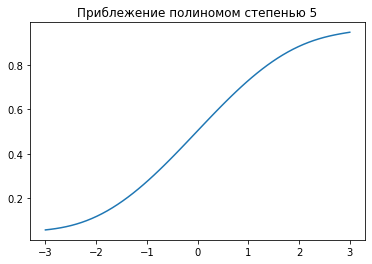

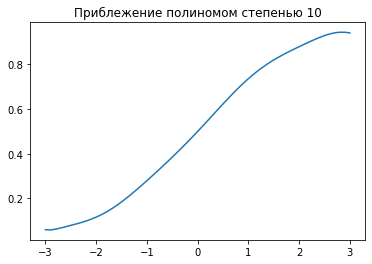

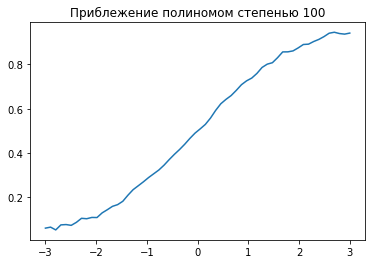

Text(0.5, 0, 'степень полинома')

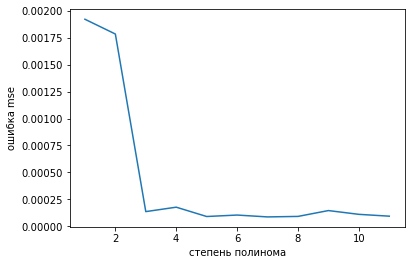

In [384]:
def sig(x):
    return 1/(1+np.exp(-x)) + np.random.normal(0, 0.01, x.shape)

import plotly.graph_objects as go

x = np.linspace(-3, 3, 60)
y = sig(x)

arr =np.array([5, 10, 100])

for i in arr:
    coefs = np.polyfit(x, y, deg = i)
    poly = np.poly1d(coefs)
    plt.plot(x, poly(x))
    plt.title("Приблежение полиномом степенью " + str(i))
    plt.show()


X = np.linspace(-3, 3, 60)
y = sig(X)   
tmp=11


mse = np.empty(())
DEG = np.arange(1, tmp+1)
for i in range(1, tmp+1):
        coefs = np.polyfit(X, y, deg = i)
        poly = np.poly1d(coefs)
        mse = np.append(mse, np.square(sig(X)-poly(x)).mean())
plt.plot(DEG, mse[1:])
plt.ylabel("ошибка mse")
plt.xlabel("степень полинома")

Выводы: 
1) без шума на отрезке от -3 до 3 сигмойда начинает хорошо приближаться многочленам 4 и более степени
2) если добавить нормальный шум, то сигмойда перестанет быть гладкой, лучше всего будет аппроксимировать полином 5-6 степени, так как при большей степени мы слишком подстороимся под шум, который добавили, а при меньшей недостаточно 
3) если добавить больше тренеровочных точек и сделать шум немного по меньше, то видим, что большие степени также подстаиваются под сигмойду (10 например, 100 уже хуже, так как подстаивается под весь шум)

## 7. Линейная регрессия на реальных данных

До этого мы учились приближать одномерную функцию многочленом. Каждая точка имела ровно один признак - коодинату $x$.

Тем не менее, чаще всего в машинном обучении признаков гораздо больше. Возьмем какой-нибудь реальный датасет.

In [234]:
# https://drive.google.com/file/d/13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb/view?usp=sharing
!gdown --id 13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [387]:
data = pd.read_csv('C:/Users/Alina/Desktop/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


В датасете показаны результаты продаж разных товаров в зависимости от ресурсов (тысяч долларов), которые вложили в различные средства распространения информации:
* TV - реклама по телевизору
* radio - на радио
* newspapers - в газетах

Целевая переменная:

sales - продажи такого-то товара (тысячи штук)

In [388]:
# Размеры датасета
data.shape

(200, 4)

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [390]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Признаков немного, поэтому давайте попробуем визуализиовать зависимость целевой переменной от каждого из признаков.

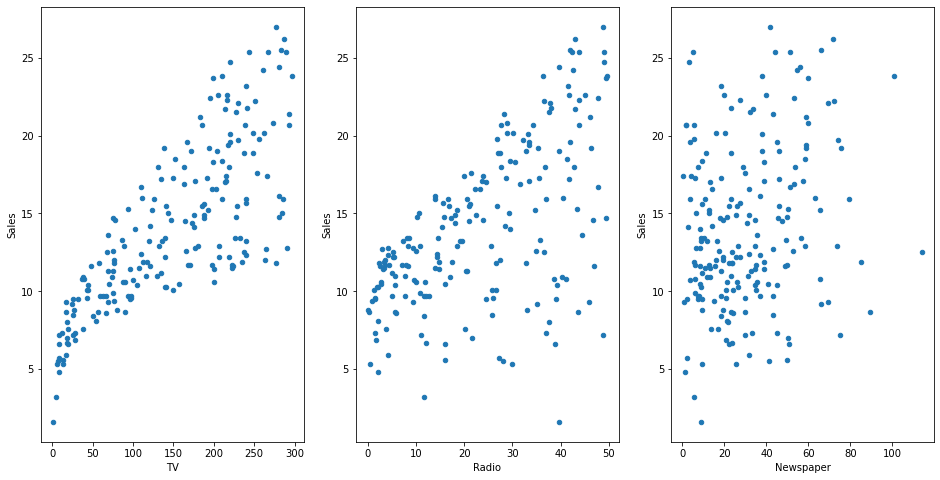

In [391]:
fig, axs = plt.subplots(1, 3,)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

### Простая линейная регрессия

Из графиков выше предположим, что только размер рекламы на телевизоре влияет на продажи больше всего. Формула для такого случая выглядит следующим образом:
$$y=\beta_0+\beta_1x$$
Здесь:
* $y$ - наше предсказание продаж
* $x$ - сколько денег вложили в рекламу по телевидению
* $\beta_0$ - сдвиг
* $\beta_1$ - параметр, отвечающий за важность признака x

$\beta_0$ и $\beta_1$ - это параметры нашей модели. Чтобы создать хорошую модель, надо "обучить" эти значения. Т.е. изменить их так, чтобы они хорошо работали для нашей задачи.

### Обучение коэффициентов модели

Параметры $\beta_0$ и $\beta_1$ подбираются таким образом, чтобы минимизировать **сумму наименьших квадратов ошибок**:

$$Q(MSE)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

<img src="https://i.pinimg.com/originals/95/99/b0/9599b04198dc617282026d00a6e8f9d4.png">

* Фиолетовые точки на даграмме $y^{true}$ - это полученные истинные значения x и y .
* Синяя линия $y^{pred}$ - это наша модель: линия, которой мы стараемся приблизить данные .
* Красные отрезки - это ошибки нашей модели.


Как коэффициенты $\beta_0$ и $\beta_1$ соотносятся с синей линией:
* $\beta_0$ - это сдвиг нашей прямой, т.е. значение y при x = 0.
* $\beta_1$ - это тангенс угла наклона прямой.

Как искать данные коэффициенты? Есть много техник: аналитическое решение, методы основанные на градиентном спуске. Пока же достаточно знать, что многие библиотеки (в том числе и sklearn) умеют это делать. Зачем кожаному мешку напрягаться :)

In [392]:
from sklearn.linear_model import LinearRegression

# Наша модель
reg = LinearRegression()

# Подготовим данные для неё
# На вход требуется 2D матрица, а у нас только один признак,
# и надо превратить его из 1D вектора (n,) в 2D матрицу (n, 1).
# Это можно сделать с помощью метода reshape
x = data["TV"].values.reshape(-1, 1) 
y = data["Sales"].values

# Обучаем нашу модель
reg.fit(x, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

Сдвиг=7.032593549127693
Массив коэффициентов=[0.04753664]


### Интерпретируем коэффициенты
Что означает коэффициент, связанный с телевидением ($\beta_1$)?
* Дополнительные 1000 000$, вложенные на в рекламу на телевидении, позволят продажам товара вырасти где-то на 0.047 * 1000 = 47 тысяч единиц.

In [393]:
# Посчитаем ручками
7.032594 + 0.047537*1000

54.56959400000001

In [394]:
X_new = pd.DataFrame({'TV': [1000]})
X_new.head()

,TV
0,1000


In [395]:
reg.predict(X_new)

array([54.56923398])

### Нарисуем нашу прямую

In [396]:
# Возьмём предсказания для данных, на которых обучались
y_pred = reg.predict(x)
y_pred.shape

(200,)

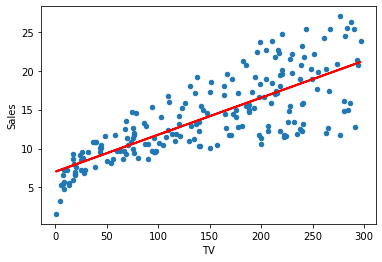

In [397]:
# Сначала выведем истинные данные
data.plot(kind='scatter', x='TV', y='Sales')

# Теперь рисуем нашу линию
plt.plot(x, y_pred, c='red', linewidth=2)
plt.show()

Посчитаем ошибку MSE на обучающей выборке:


In [398]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y))

10.512652915656757


### Используем все признаки

Простую линейную регрессию с одним признаком можно легко расширить на случай нескольких признаков:
$$y=\beta_0+\beta_1x_1+...+\beta_nx_n$$

А для нашего датасета это будет выглядеть так:
$$Sales=\beta_0+\beta_1*TV+\beta_2*radio+\beta_3*newspaper$$

Давайте опять воспользуемся sklearn, чтобы их оценить:

In [399]:
reg = LinearRegression()

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))

Сдвиг = 2.9388893694594085
Коэффициент для TV = 0.045764645455397615
Коэффициент для Radio = 0.18853001691820456
Коэффициент для Newspaper = -0.0010374930424763272


Вес признака отвечает также, как и в предыдущем случае за значимость этого признака. Для газет он вообще отрицательный. Вычислим ошибку на обучающей выборке.

In [400]:
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))

2.784126314510936


Ошибка уже меньше, чем при одном признаке, однако измерять ошибку на обучающей выборке неправильно. Помимо истинной зависимости между признаками и целевой переменной, туда могут затесаться случайности, лишние данные и прочие факторы. Если не ограничивать каким-то образом модель (об этом мы узнаем позднее), то модель легко подстраивается под эти шумы. Она начинает показывать очень хорошее качество на обучающей выборке, но когда мы попробуем посмотреть качество на других выборках, то там модель будет показывать себя плохо. Это и есть переобучение.

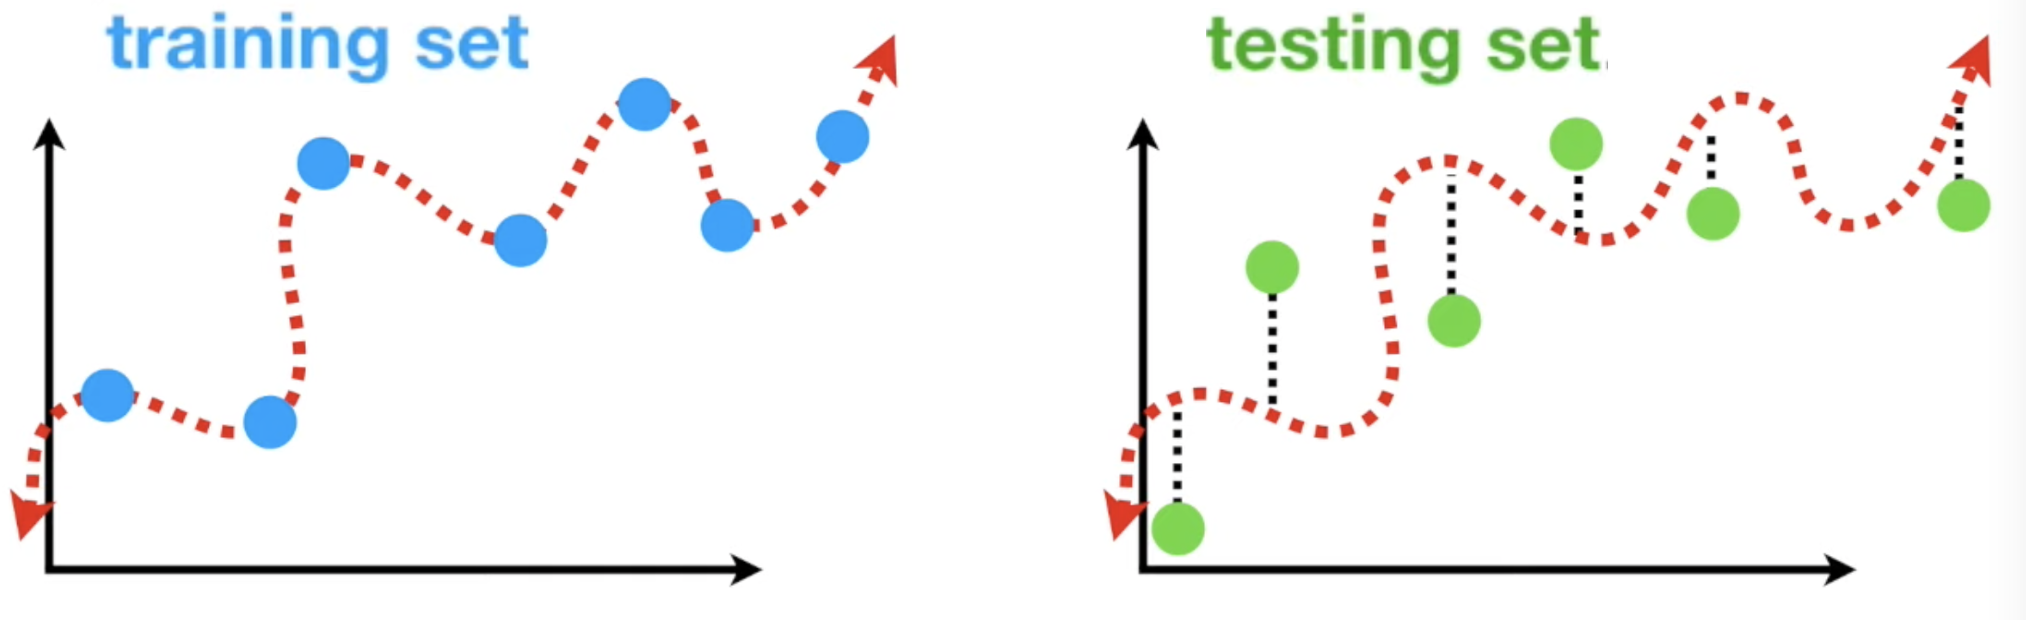

Поэтому применим кросс-валидацию:

In [401]:
# Многие выбирают k=5 для начала
k = 5
errors = []

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Размер одной части
fold_size = len(X) // k


for i in range(k):
    # Берём все значения, кроме выбранной части
    X_train = X[:i * fold_size].append(X[(i + 1) * fold_size:])
    y_train = y[:i * fold_size].append(y[(i + 1) * fold_size:])
    
    # Берём выбранную часть
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]
    
    # На каждой итерации обучаемся отдельно и сохраняем ошибку
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))
    
# Выводим ошибку на кросс-валидации
print(np.mean(errors))

3.07294659710021


In [402]:
# А можно не париться и попросить sklearn всё сделать за нас
from sklearn.model_selection import cross_val_score

# Берём с отрицательным знаком, т.к. обычно туда передаётся не функция потерь, которую надо минимизировать
# А что-то вроде "функции успеха", которую надо максимизировать
errors = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(errors))

3.07294659710021


Видно, что ошибка больше, чем тогда на обучающей выборке, поэтому есть показания думать, что это переобучение. Отчего оно обычно происходит? Мы берём слишком много лишних признаков или делаем модель слишком сложной для данной задачи. Для решения этой задачи существует регуляризация.

### Регуляризация

Регуляризация - это искусстенное занижение всех параметров моделей ($\beta_0,\beta_1,...$). Это помогает упростить модель, т.к. низкие значения $\beta_i$ означают, что модель будет выдавать результаты близкие к прямой (или гиперплоскости, если параметров много). А также зануление некоторых коэффициентов может убрать ненужные признаки из обучения. Однако как всё это сделать так, чтобы не убрать нужные признаки?

Посмотрим на функцию потерь, которую мы минимизируем:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

Добавим туда слагаемое, которое поможет нам понизить значения наших $\beta_i$:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m\beta_i^2$$

Действительно, если мы будем понижать нашу функцию потерь $L(\beta)$, то мы будем минимизировать и второе слагаемое, которое и отвечает за абсолютные величины $\beta_i$. Осталось указать, что $\lambda$ это некоторый числовой коэффициент, который позволяет играться между очень сильной и очень слабой регуляризацией. Если он большой, то регуляризация сильная и модель будет более простой, меньше переобучаться, больше недообучаться, и наоброт. 

Забыл добавить, что это была L2-регуляризация.
L1-регуляризация выглядит так:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m|\beta_i|$$
Она отличается от L2 тем, что она обнуляет некоторые коэффициенты, а L2 пытается всё уменьшать равномерно.

В sklearn L1-регуляризация - это Lasso, а L2-регуляризация - это Ridge. Давайте посмотрим, какое качество они нам дадут на кросс-валидации.

In [403]:
# L1
from sklearn.linear_model import Lasso

reg = Lasso( ).fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг=3.0402155834803786
Коэффициент для TV=0.045661415380019464
Коэффициент для Radio=0.18346439758868255
Коэффициент для Newspaper=0.0

Результат=3.041405896751369


Видно, что признак с рекламой в газетах модель захотела полностью убрать из выборки.

In [404]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge( ).fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг = 2.9389674583301524
Коэффициент для TV = 0.04576464365801847
Коэффициент для Radio = 0.1885250968107854
Коэффициент для Newspaper = -0.0010362939589069462

Результат=3.0729326732984985


In [405]:
reg.coef_

array([ 0.04576464,  0.1885251 , -0.00103629])

Тут модель полностью не зануляла все признаки, а уменьшила их веса некоторых из них, а некоторых увеличила. Но изменения были столь незначительные, что качество не изменилось.

Как видно, качество не сильно улучшилось. Это всё потому что, мы не подбирали параметр параметр lambda (в моделях он называется alpha), а оставили его равным 1.0. Вот тут нам и приходит на помощь кросс-валидация.

Попробуем сначала Lasso. Давайте сначала поступим по тупому, и будем выбирать параметр lambda на обучающей выборке.

In [406]:
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2.7842286851696874)
(0.30000000000000004, 2.784985993046452)
(0.5000000000000001, 2.7857256993570276)
(0.7000000000000001, 2.7868352725638887)
(0.9000000000000001, 2.7883147049707757)
(1.1000000000000003, 2.790163996577688)
(1.3000000000000003, 2.7923831473846246)
(1.5000000000000004, 2.7949721573915864)
(1.7000000000000004, 2.797931026598574)
(1.9000000000000004, 2.801259755005587)
(2.1000000000000005, 2.8049583426126237)
(2.3000000000000007, 2.809026789419686)
(2.5000000000000004, 2.813465095426773)
(2.7000000000000006, 2.8182732606338856)
(2.900000000000001, 2.8234512850410236)

Оптимальная lambda:
Lambda=0.10, результат=3.07


А теперь сделайте так, чтобы сохранялась ошибка не на обучающей выборке, а на кросс-валдиации (cross_val_score) и минимум выбирался из неё. 

**(0.5 балла) Обязательное задание 4:** нарисуйте график зависимости ошибки на тестовом множестве от коэффициента регуляризации. При какой степени ошибка минимальна?

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]

Оптимальная lambda:
Lambda=1.90, результат=3.03


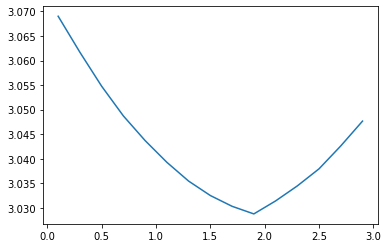

In [424]:
from sklearn.model_selection import cross_val_score

lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на тестовой выборке
    lambda_errors.append((val, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))))
    #print(val, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')))
    
    
#print(lambda_errors)
min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))


print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

f = [x[0] for x in lambda_errors]
s = [x[1] for x in lambda_errors]

plt.plot(f, s)


**(0.5 балла) Обязательное задание 5:** Сделайте то же самое для L2-регуляризации:

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]

Оптимальная lambda:
Lambda=2.90, результат=3.07


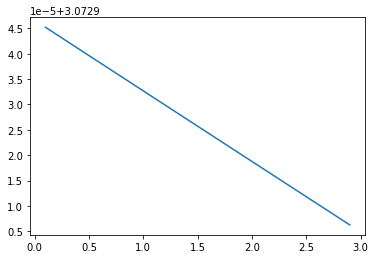

In [425]:
from sklearn.model_selection import cross_val_score

lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Ridge(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на тестовой выборке
    lambda_errors.append((val, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))))
    #print(val, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')))
    
    
#print(lambda_errors)
min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Ridge(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))


print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

f = [x[0] for x in lambda_errors]
s = [x[1] for x in lambda_errors]

plt.plot(f, s)


Если всё было правильно, то данные манипуляции помогут немного улучшить качество вашей модели. Это поднимет вас на несколько мест в соревнованиях, или вашему работодателю даст побольше прибыли.

## P.S. meme

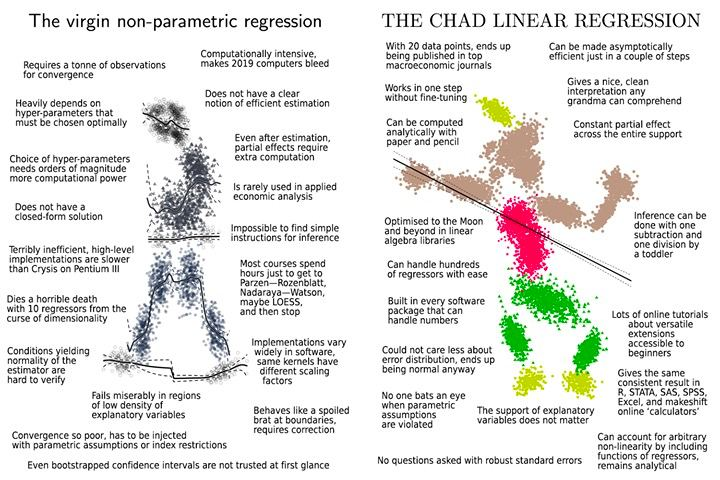

## Дополнительные материалы для самостоятельного изучения

* Визуальное представление основ линейной алгебры [здесь](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab). (рус. субтитры)

* Визуальное представление основ математического анализа [здесь](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr). (рус. субтитры)

# Основное домашнее задание (6 баллов + гешефт за улучшения)

In [ ]:
# https://drive.google.com/file/d/1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu/view?usp=sharing
! gdown --id 1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu

Downloading...
From: https://drive.google.com/uc?id=1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu
To: /content/diabetes.data.csv
100% 18.5k/18.5k [00:00<00:00, 14.4MB/s]


Для домашнего задания вы используете другой датасет.

In [535]:
data = pd.read_csv('C:/Users/Alina/Desktop/diabetes.data.csv', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Посмотрим какая информация содержится в нашем датасете:
1) возраст
2) пол 
3) индекс массы тела
4) кровяное давление
5) 6 показателей сыворотки крови
6) количественный показатель прогрессирования заболевания через год

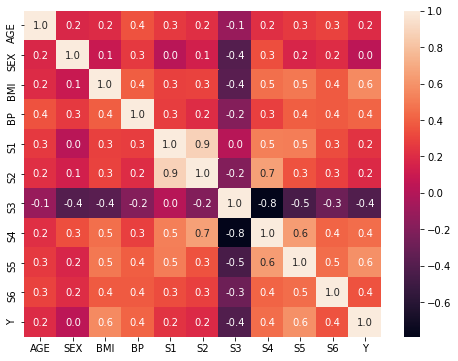

In [537]:
plt.figure(figsize=(8, 6))

sns.heatmap(data.corr(method='spearman'), annot=True, fmt=".1f");

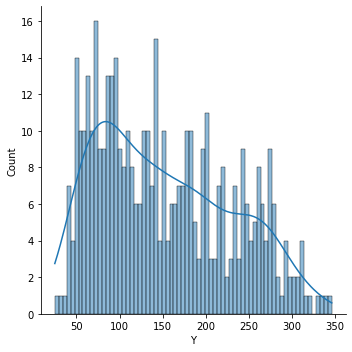

In [539]:
sns.displot(data.Y, bins=70, kde=True)

Видим, что наше распределение не нормальное, попробуем про логарифмировать

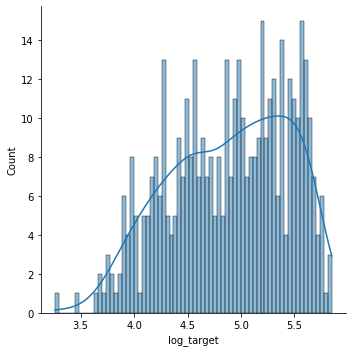

In [540]:
df = data.assign(log_target=np.log(data.Y + 1))
sns.displot(df.log_target, bins=70, kde=True)

Не особо помогло

В датасете приводится информация о пациентах и их состоянии при заболевании диабетом. Описание признаков можно прочитать [здесь](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Колонка Y - целевая переменная:

In [443]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 10), (442,))

Как мы видим в нашем датасете находятся 442 пациента с диабетом


**Ваша задача** - провести то же исследование, что и в датасете в самом начале (Sales ~ TV, Radio, Newspaper). В итоге, нужно получить модель линейной регрессии, качество которой надо вывести с помощью cross_val_score с метрикой MSE (тоже самое в общем).

**Целевая метрика - MSE**

За каждое достойное улучшение качества на cross_val_score будут доп. баллы. Не забудьте описать, что использовали, что получилось и нет, а также попробуйте понять почему. Побольше гуглите. 

Возможные улучшения:
* Нормализация данных: вычитаем из каждой колонки её среднее и делим на стандартное отклонение.
* Пробуйте убрать ненужные признаки.
* Можно перемножать некоторые признаки.
* Погуглите что-то вроде "improve linear regression".

В общем, представьте, что вы работаете датасаентистом, получаете *300K bucks*, а вам сказали, что нужно как можно лучше уметь предсказывать такие данные.

<img src="https://c.tenor.com/JZ1XdjdbHs8AAAAC/futurama-fry.gifhttps://c.tenor.com/3M8C_1GPijcAAAAC/master-gachi.gif">

Продолжим исследовать наши данные

In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [434]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Визуализируем полученные данные, чтобы иметь более наглядное представление о данных

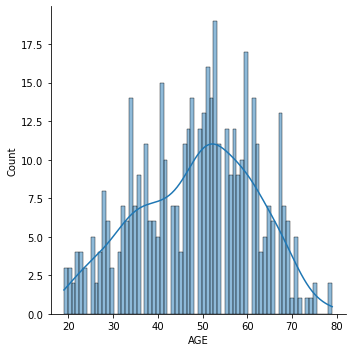

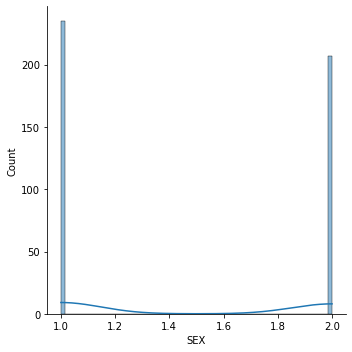

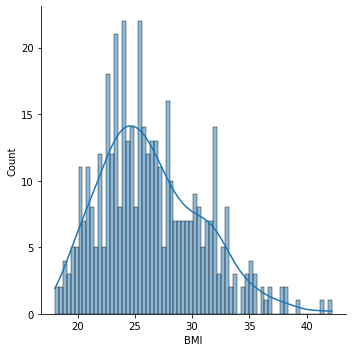

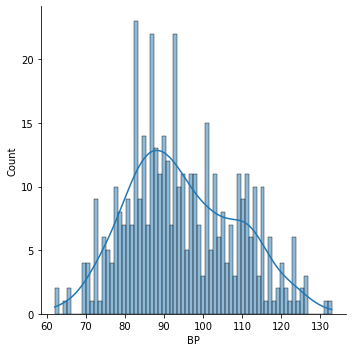

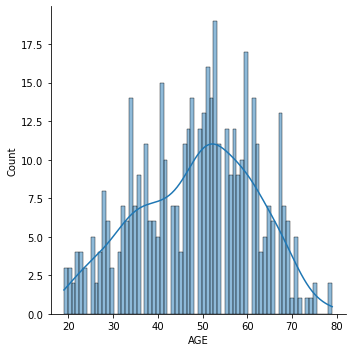

In [543]:
sns.displot(data.AGE, bins=70, kde=True)
sns.displot(data.SEX, bins=70, kde=True)
sns.displot(data.BMI, bins=70, kde=True)
sns.displot(data.BP, bins=70, kde=True)
sns.displot(data.AGE, bins=70, kde=True)
#a = px.histogram(data, data.AGE)
#b = px.histogram(data, data.SEX)
#c = px.histogram(data, data.BMI)
#d = px.histogram(data, data.BP)
#e = px.histogram(data, data.Y)
#a.show()
#b.show()
#c.show()
#d.show()
#e.show()

Постараемся вузуализировать Y в зависимости от каждого признака

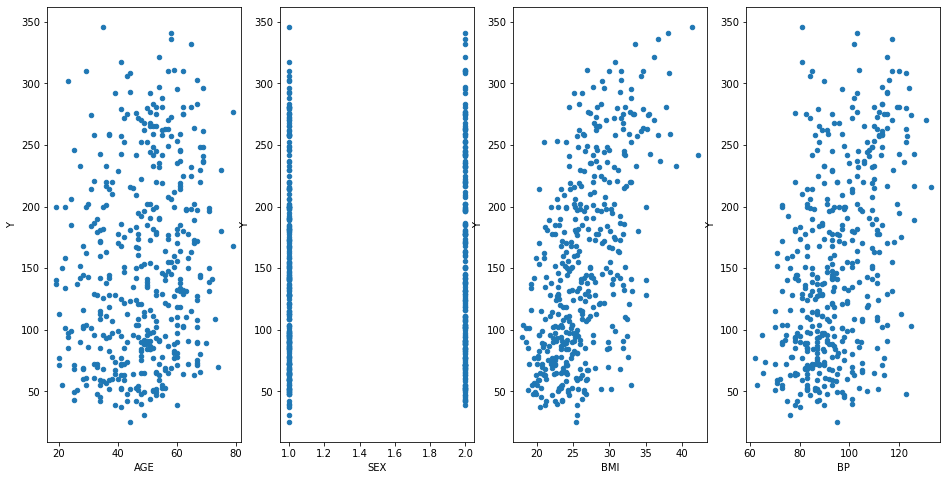

In [442]:
fig, axs = plt.subplots(1, 4,)
data.plot(kind='scatter', x='AGE', y='Y', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='SEX', y='Y', ax=axs[1])
data.plot(kind='scatter', x='BMI', y='Y', ax=axs[2])
data.plot(kind='scatter', x='BP', y='Y', ax=axs[3])
plt.show()

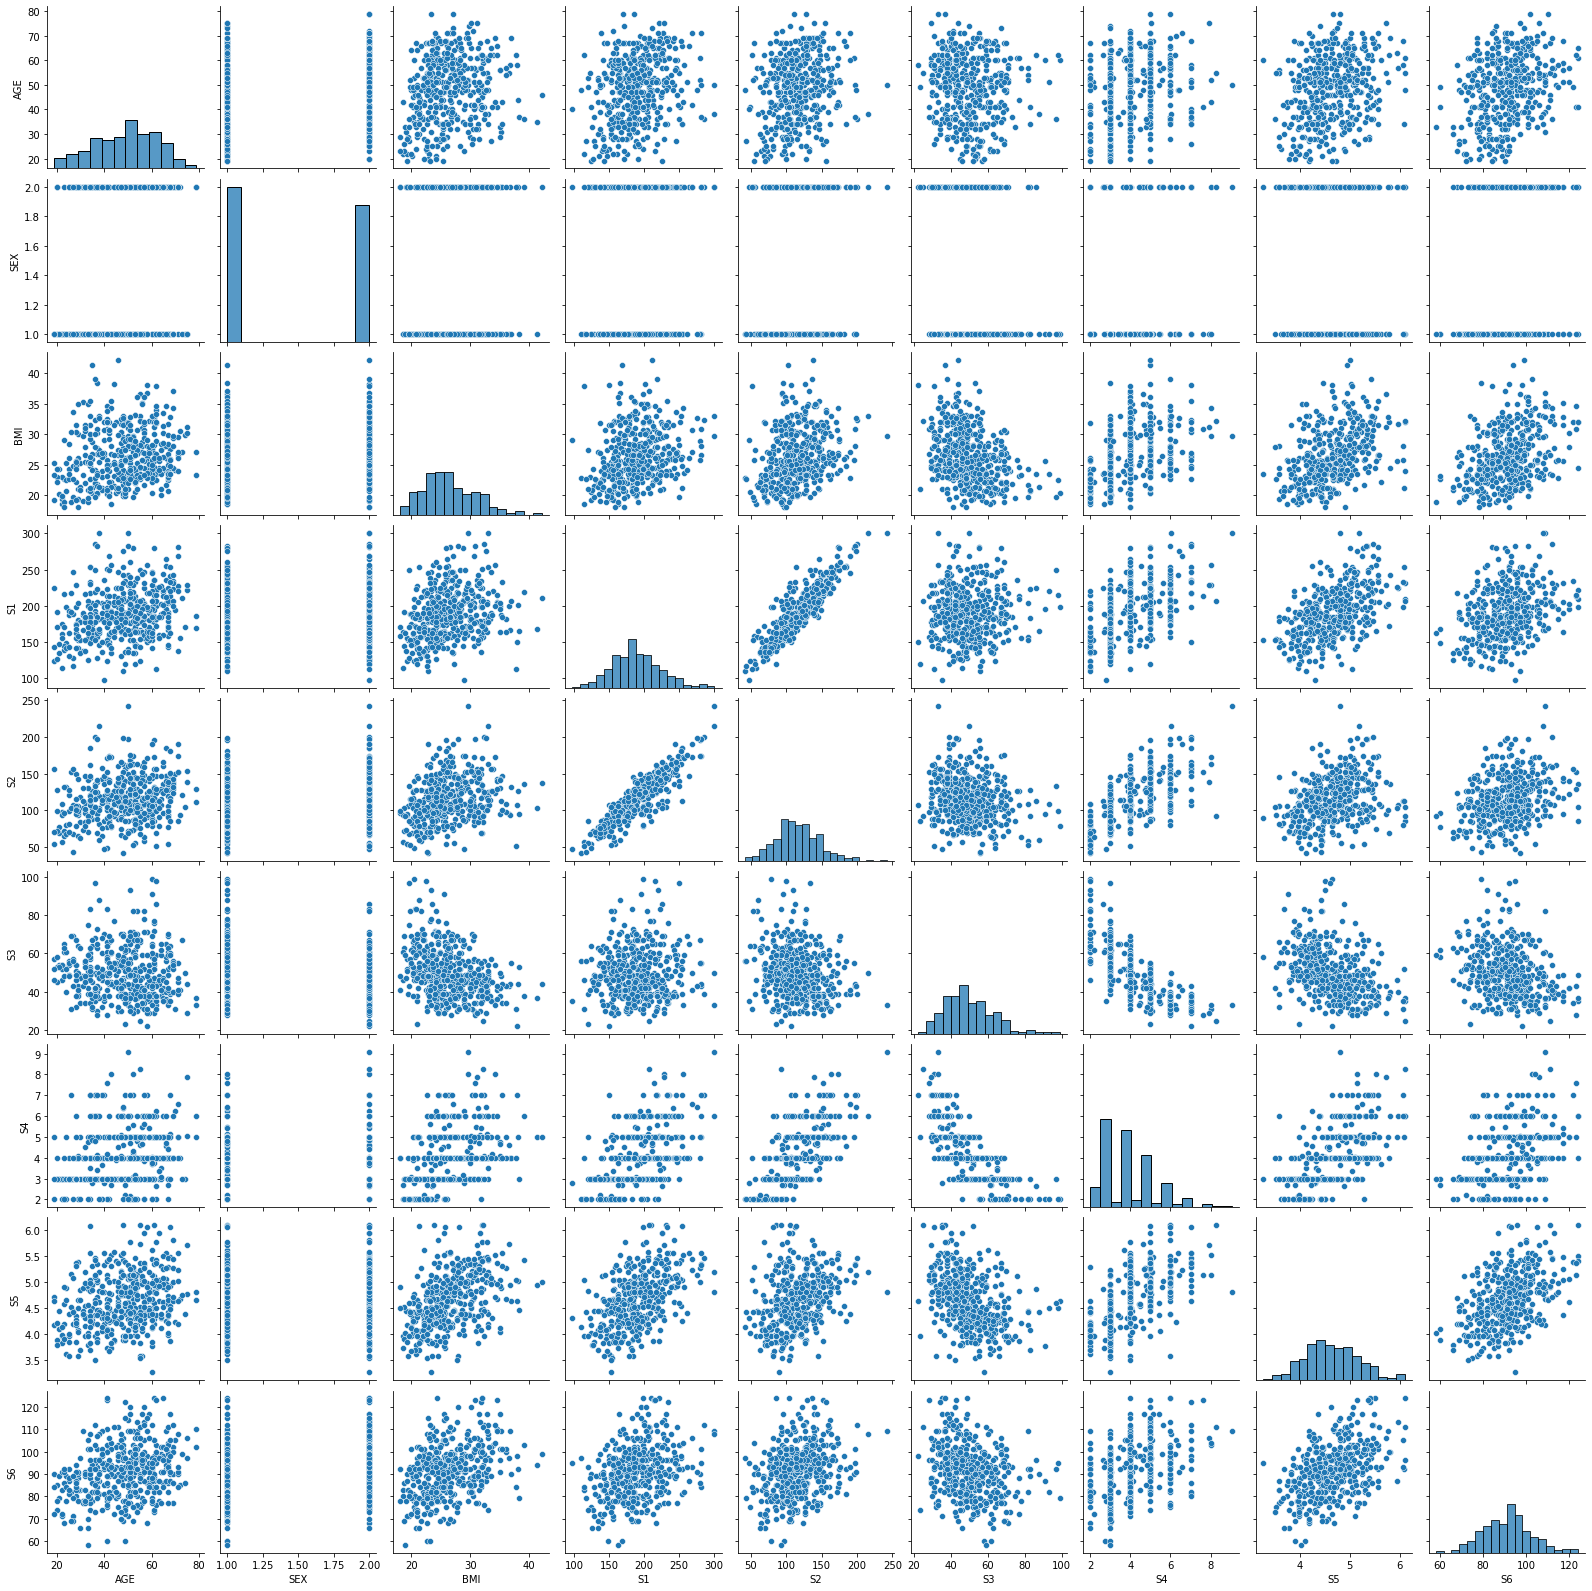

In [520]:
import seaborn as sns
cols = ['AGE', 'SEX', 'BMI', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
sns_plot = sns.pairplot(data[cols])
sns_plot

Попробуем сразу обучить нашу модель:

In [522]:
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,one
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,0
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,1
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,2
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,3
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,4
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,437
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,438
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,439
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,440


In [561]:
data = pd.read_csv('C:/Users/Alina/Desktop/diabetes.data.csv', sep='\t')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

#print(data)
ans = data.Y

data.pop('Y')
data_new = data
data_new["one"] = np.arange(442)
#print(data, ans)

X_train, X_test, y_train, y_test = train_test_split(data_new, ans, test_size=0.1, random_state=42)

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_norm, y_train)
ans_pred = reg.predict(X_test_norm)

print(reg.coef_)
mean_squared_error(y_test, ans_pred)

print(r2_score(y_test, ans_pred))

[  0.89559964 -12.45096774  23.91006643  16.18086801 -40.42446143
  23.15955652   5.93332955  11.46139516  34.28647173   3.36193724
   0.67714874]
0.5507391725248196


Попробуем использовать регуляризацию

In [550]:
from sklearn.model_selection import cross_val_score


lambdas = np.arange(0.0, 3.0, 0.1)
lambda_errors = []

for i in lambdas:
    reg = Lasso(alpha=i)
    lambda_errors.append((i, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))))
    print(i, np.mean(-cross_val_score(reg, X,y, cv=5, scoring='neg_mean_squared_error')))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_train_error))

0.0 2993.0813107145577
0.1 2993.8025348658416
0.2 2995.5814751714556
0.30000000000000004 2998.594288068988
0.4 3003.297672574249
0.5 3007.925585445333
0.6000000000000001 3012.806060309994
0.7000000000000001 3017.3764479543183
0.8 3022.5365555469666
0.9 3028.640275362545
1.0 3036.7597623128067
1.1 3045.2052254212276
1.2000000000000002 3053.8917197274272
1.3 3063.283792566651
1.4000000000000001 3073.5736358680615
1.5 3084.7454106334044
1.6 3096.657156764243
1.7000000000000002 3109.2086674839597
1.8 3121.6138628994418
1.9000000000000001 3130.5997445725166
2.0 3137.6343666252988
2.1 3143.3589336103796
2.2 3146.332372355365
2.3000000000000003 3149.5265688439013
2.4000000000000004 3152.598781887884
2.5 3155.2742555119526
2.6 3157.9733950101363
2.7 3160.7197809139934
2.8000000000000003 3163.5780189536554
2.9000000000000004 3166.545199954877

Оптимальная lambda:
Lambda=0.00, результат=2993.08


Так как параметр лямбда равен нулю, попробуем использовать ридж


In [553]:
from sklearn.model_selection import cross_val_score


lambdas = np.arange(0.0, 300.0, 1)
lambda_errors = []

for i in lambdas:
    reg = Ridge(alpha=i)
    lambda_errors.append((i, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))))
    #print(i, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_train_error))


Оптимальная lambda:
Lambda=0.00, результат=2993.08


Как видим использовать регуляризацию не имеет смысла, поэтому попробуем использовать стэкинг

In [549]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=5, random_state=1)

er = VotingRegressor([('lr', r1), ('rf', r2)])

er.fit(X_train_norm, y_train)
ans_pred = er.predict(X_test_norm)

#print(er.coef_)
mean_squared_error(y_test, ans_pred)

r2_score(y_test, ans_pred)

0.4597924016208801

Попробуем подобрать другую модель и сравним с линейной регркссией

In [554]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

models = [LinearRegression(), ElasticNet(), KNeighborsRegressor()]
scores = dict()

for m in models:
    m.fit(X_train_norm, y_train)
    y_pred = m.predict(X_test_norm)

    print(f'model: {str(m)}')
    print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)}')
    print(f'MAE: {round(mean_absolute_error(y_test, y_pred), 3)}')
    print(f'RMSLE: {round(np.sqrt(mean_squared_log_error(y_test, y_pred)), 3)}')
    print('-'*30, '\n')

model: LinearRegression()
RMSE: 52.422
MAE: 41.585
RMSLE: 0.381
------------------------------ 

model: ElasticNet()
RMSE: 54.118
MAE: 43.925
RMSLE: 0.397
------------------------------ 

model: KNeighborsRegressor()
RMSE: 58.051
MAE: 45.093
RMSLE: 0.408
------------------------------ 



Линейная модель дает наименьшую ошибку, попробуем убрать признак S3 так как он дает большую линейную зависимость с остальными

In [567]:
data = pd.read_csv('C:/Users/Alina/Desktop/diabetes.data.csv', sep='\t')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

#print(data)
ans = data.Y

data.pop('Y')
data.pop('S3')
data.pop("AGE")
data.pop("S6")
data_new = data
#print(data, ans)

X_train, X_test, y_train, y_test = train_test_split(data_new, ans, test_size=0.1, random_state=42)

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

models = [LinearRegression(), ElasticNet(), KNeighborsRegressor()]
scores = dict()

for m in models:
    m.fit(X_train_norm, y_train)
    y_pred = m.predict(X_test_norm)

    print(f'model: {str(m)}')
    print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)}')
    print(f'MAE: {round(mean_absolute_error(y_test, y_pred), 3)}')
    print(f'RMSLE: {round(np.sqrt(mean_squared_log_error(y_test, y_pred)), 3)}')
    print(f'R^2: {round(r2_score(y_test, ans_pred), 3)}')
    print('-'*30, '\n')

model: LinearRegression()
RMSE: 51.998
MAE: 41.655
RMSLE: 0.376
R^2: 0.551
------------------------------ 

model: ElasticNet()
RMSE: 53.884
MAE: 44.147
RMSLE: 0.396
R^2: 0.551
------------------------------ 

model: KNeighborsRegressor()
RMSE: 56.502
MAE: 44.4
RMSLE: 0.404
R^2: 0.551
------------------------------ 



Посмотрим наиболее важные признаки

In [559]:
data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S4', 'S5', 'S6', 'one'], dtype='object')

In [562]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(reg, X_test_norm, y_test, n_repeats=15)

perm_df = pd.DataFrame((perm['importances_mean'], data.columns.to_list()),
                       index=('Score', 'Features'))
perm_df = perm_df.T
perm_df = perm_df.sort_values(ascending=False, by='Score')

In [563]:
perm_df

,Score,Features
8,0.499096,S5
4,0.405533,S1
2,0.279084,BMI
5,0.246023,S2
3,0.06278,BP
7,0.040173,S4
1,0.033897,SEX
6,0.021745,S3
9,0.003232,S6
10,-0.000759,one


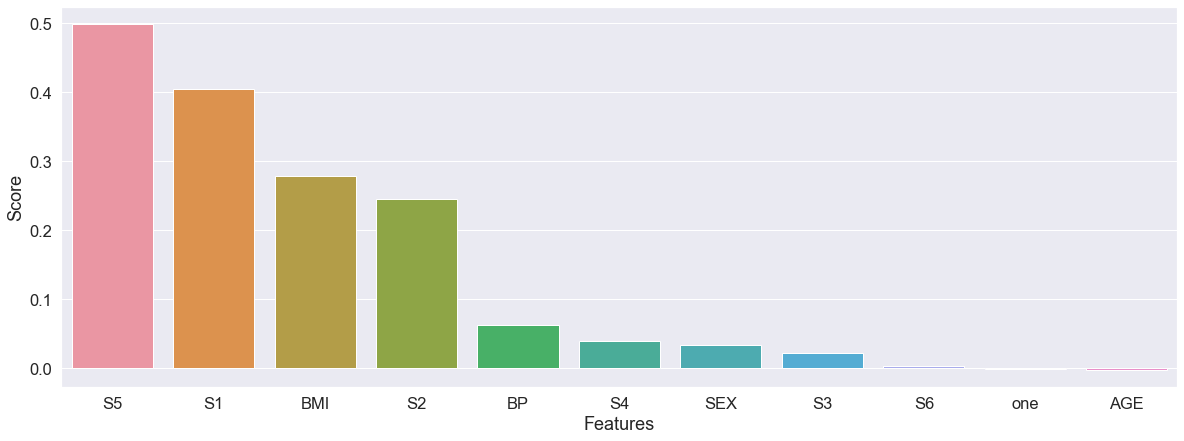

In [564]:
plt.figure(figsize=(20, 7))

sns.set(font_scale=1.5)
sns.barplot(x="Features", y="Score", data=perm_df)

plt.show()